In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [154]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure

output_notebook()

from bokeh.models.tools import HoverTool
# Su dung ColumnDataSource
from bokeh.models import ColumnDataSource

In [155]:
df = pd.read_excel('/content/sample_data/diamond.xlsx')
df.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**Câu 1 : Carat có giá trị bao nhiêu ?**

In [156]:
df_carat= df.loc[:,['carat','price']]
df_carat

,carat,price
0,0.23,326
1,0.21,326
2,0.23,327
3,0.29,334
4,0.31,335
...,...,...
53935,0.72,2757
53936,0.72,2757
53937,0.70,2757
53938,0.86,2757


In [157]:
df_carat2= df_carat.groupby('carat').mean()
df_carat2

,price
carat,
0.20,365.166667
0.21,380.222222
0.22,391.400000
0.23,486.143345
0.24,505.185039
...,...
4.00,15984.000000
4.01,15223.000000
4.13,17329.000000


In [159]:
df_caratbb= df_carat2.reset_index()
df_caratbb

,carat,price
0,0.20,365.166667
1,0.21,380.222222
2,0.22,391.400000
3,0.23,486.143345
4,0.24,505.185039
...,...,...
268,4.00,15984.000000
269,4.01,15223.000000
270,4.13,17329.000000
271,4.50,18531.000000


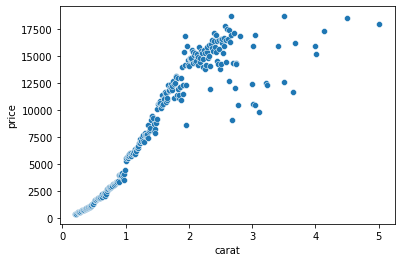

In [183]:
sns.scatterplot(x='carat',y='price',data=df_carat2)
#sns.jointplot(df_caratbb.carat, df_caratbb.price, kind="hex", color="#4CB391")

In [184]:
src= ColumnDataSource(df_carat2)
#src= ColumnDataSource(df_caratbb)
src

ColumnDataSource(id='12610', ...)

In [185]:
ht= HoverTool(tooltips=[('<b>Carat','@carat'),('<b>Price','@price')])
p=figure(plot_width=600, plot_height=500,tools=[ht])

p.circle(x='carat', y='price', source=src, size=6, color='purple')
p.xaxis.axis_label = 'CARAT'
p.yaxis.axis_label = 'PRICE'
p.title.text = 'GIÁ THEO CARAT'
show(p)

#p = figure(match_aspect=True, tools="wheel_zoom,reset")
#p.background_fill_color = 'white'
#p.grid.visible = False

#p.hexbin(x=df_caratbb['carat'], y=df_caratbb['price'], size=0.5, hover_color="pink", hover_alpha=0.8)


#show(p)

**Biểu đồ cho thấy giá của từng carat mặc dù cùng carat nhưng có giá khác nhau => cho ta thấy người ta không chỉ đánh giá kim cương qua carat mà còn qua những chỉ tiêu khác để đánh giá 1 kim cương**

**Câu 2: MẶT CẮT CÓ ẢNH HƯỞNG TỚI GIÁ TIỀN KHÔNG ?**

In [186]:
df_cut = df.loc[:,['cut','price']]
df_cut

,cut,price
0,Ideal,326
1,Premium,326
2,Good,327
3,Premium,334
4,Good,335
...,...,...
53935,Ideal,2757
53936,Good,2757
53937,Very Good,2757
53938,Premium,2757


In [187]:
df_cut2 = df_cut.groupby('cut').mean()
df_cut2

,price
cut,
Fair,4358.757764
Good,3928.864452
Ideal,3457.541970
Premium,4584.257704
Very Good,3981.759891


In [188]:
data = pd.DataFrame(df_cut2).reset_index()
data

,cut,price
0,Fair,4358.757764
1,Good,3928.864452
2,Ideal,3457.541970
3,Premium,4584.257704
4,Very Good,3981.759891


In [189]:
src2= ColumnDataSource(data=df_cut2)
src2

ColumnDataSource(id='13076', ...)

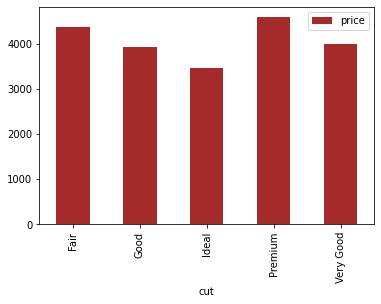

In [190]:
df_ve=df_cut2.plot(kind='bar', color='brown')

In [191]:
ht2= HoverTool(tooltips=[('<b>CUT','@cut'),('<b>Price','@price')])
p = figure(x_range=data['cut'], plot_height=400, title="BẢNG ĐÁNH GIÁ", tools=[ht2])
p.vbar(x='cut', top='price', width=0.2, color='brown',source=src2)

show(p)

**Biểu đồ cho thấy giá của kim cương có sự chênh lệch qua độ mặt cắt của kim cương có tốt hay không**

**Câu 3: ĐỘ CẠNH CÁC MẶT CẮT CÓ ẢNH HƯỞNG NHƯ THẾ NÀO TỚI PHÂN BIỆT ĐỘ CẮT**

In [192]:
df_cutxyz= df.loc[:,['cut','x','y','z']]
df_cutxyz

,cut,x,y,z
0,Ideal,3.95,3.98,2.43
1,Premium,3.89,3.84,2.31
2,Good,4.05,4.07,2.31
3,Premium,4.20,4.23,2.63
4,Good,4.34,4.35,2.75
...,...,...,...,...
53935,Ideal,5.75,5.76,3.50
53936,Good,5.69,5.75,3.61
53937,Very Good,5.66,5.68,3.56
53938,Premium,6.15,6.12,3.74


In [193]:
df_cutxyz2 = df_cutxyz.groupby('cut').mean()
df_cutxyz2

,x,y,z
cut,,,
Fair,6.246894,6.182652,3.982770
Good,5.838785,5.850744,3.639507
Ideal,5.507451,5.520080,3.401448
Premium,5.973887,5.944879,3.647124
Very Good,5.740696,5.770026,3.559801


In [194]:
data2= pd.DataFrame(df_cutxyz2).reset_index()
data2

,cut,x,y,z
0,Fair,6.246894,6.182652,3.982770
1,Good,5.838785,5.850744,3.639507
2,Ideal,5.507451,5.520080,3.401448
3,Premium,5.973887,5.944879,3.647124
4,Very Good,5.740696,5.770026,3.559801


In [195]:
src3 = ColumnDataSource(data2)
src3

ColumnDataSource(id='13530', ...)

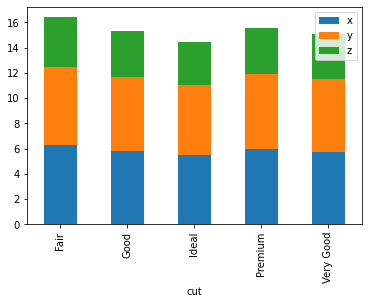

In [196]:
df_cutxyz2.plot(kind='bar', stacked=True)

In [197]:
ht3= HoverTool(tooltips=[('<b>CUT','@cut'),('<b>X','@x'),('<b>Y','@y'),('<b>Z','@z')])
colors = ["#c9d9d3", "#718dbf", "#e84d60"]
p3 = figure(x_range=data2['cut'], plot_height=250, title="ĐỘ CẮT",
            tools=[ht3])

p3.vbar_stack(stackers=['x','y','z'],x='cut', width=0.9, color=colors, source=src3)



show(p3)

**Biểu đồ này thể hiện sự đánh giá của các cạnh ảnh hưởng đến độ tốt của một giá trị kim cương**




**Câu 4: Phần trăm xuất hiện một viên kim cương clarity**

In [198]:
df_clarity = df[['clarity']]
df_clarity

,clarity
0,SI2
1,SI1
2,VS1
3,VS2
4,SI2
...,...
53935,SI1
53936,SI1
53937,SI1
53938,SI2


In [199]:
df_clarity2 = df_clarity.value_counts(normalize=True)
df_clarity2

clarity
SI1        0.242214
VS2        0.227253
SI2        0.170449
VS1        0.151483
VVS2       0.093919
VVS1       0.067760
IF         0.033185
I1         0.013737
dtype: float64

In [200]:
pt = lambda x: round(x*100,2)
df_clarity3 = df_clarity2.apply(pt)
df_clarity3

clarity
SI1        24.22
VS2        22.73
SI2        17.04
VS1        15.15
VVS2        9.39
VVS1        6.78
IF          3.32
I1          1.37
dtype: float64

In [201]:
list_clarity = list(df['clarity'].unique())
list_clarity

['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']

In [202]:
list_gtri = list(df_clarity3)
list_gtri

[24.22, 22.73, 17.04, 15.15, 9.39, 6.78, 3.32, 1.37]

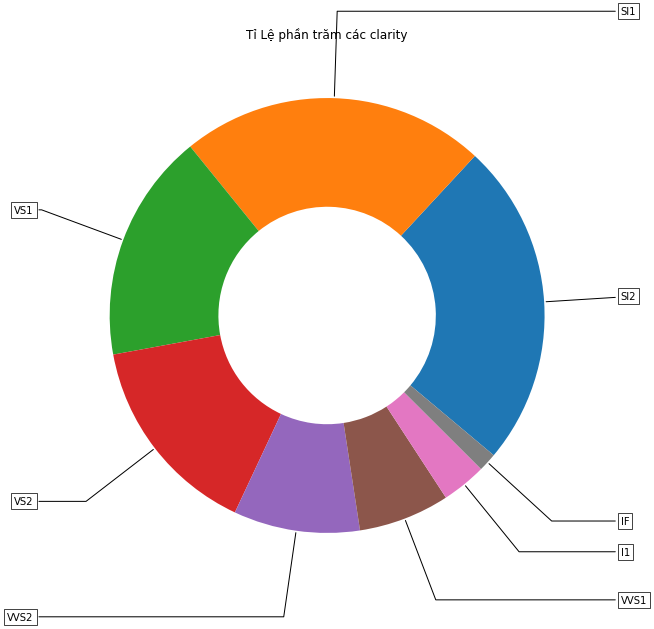

In [203]:
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw=dict(aspect="equal"))

data1 = list_clarity

data2 = list_gtri

wedges, texts = ax.pie(data2, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(data1[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Tỉ Lệ phần trăm các clarity")

plt.show()

In [204]:
from bokeh.transform import cumsum
from bokeh.palettes import Category20c
from math import pi
data = pd.Series(df_clarity3).reset_index(name='value').rename(columns={'index':'clarity'})

data['value2'] = data['value']/data['value'].sum() * 2*pi
data['color'] = Category20c[len(df_clarity3)]


p4 = figure(plot_height=350, title="Pie Chart", toolbar_location=None,
           tools="hover", tooltips="@clarity: @value", x_range=(-0.5, 1.0))

p4.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('value2', include_zero=True), end_angle=cumsum('value2'),
        line_color="white", fill_color='color', legend_field='clarity', source=data)

p4.axis.axis_label=None
p4.axis.visible=False
p4.grid.grid_line_color = None

show(p4)

**Biểu đồ thể hiện phần trăm clarity xuất hiện nhiều nhất**